In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/Kittisak008B/Data-science-bootcamp9/main/SPRINT09%20%3A%20ML/churn.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [3]:
df

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,50,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,Yes,152,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,No,61,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,No,109,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [4]:
df1=pd.get_dummies(data= df,columns = ['internationalplan', 'voicemailplan'], dtype=float)
df1

,churn,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,No,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1.0,0.0,0.0,1.0
1,No,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1.0,0.0,0.0,1.0
2,No,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1.0,0.0,1.0,0.0
3,No,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,1.0,1.0,0.0
4,No,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,50,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,1.0,0.0,0.0,1.0
4996,Yes,152,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1.0,0.0,1.0,0.0
4997,No,61,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,1.0,0.0,1.0,0.0
4998,No,109,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,1.0,0.0,1.0,0.0


In [5]:
y = df1['churn']  # pandas Series
X = df1.iloc[: , 3:] # pandas DataFrame

In [6]:
# split > train > score > evaluate
# 1. Split data
train_size=0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

In [7]:
X_test

,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
1501,272.4,88,46.31,107.9,125,9.17,185.5,81,8.35,12.7,2,3.43,0,1.0,0.0,1.0,0.0
2586,164.1,106,27.90,206.0,56,17.51,194.7,124,8.76,11.4,2,3.08,1,1.0,0.0,1.0,0.0
2653,61.6,103,10.47,255.1,110,21.68,225.9,96,10.17,12.4,5,3.35,1,1.0,0.0,0.0,1.0
1055,178.1,109,30.28,146.5,86,12.45,137.6,78,6.19,8.5,2,2.30,1,1.0,0.0,1.0,0.0
705,62.9,81,10.69,231.0,64,19.64,168.9,121,7.60,8.5,5,2.30,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,194.4,105,33.05,238.3,100,20.26,239.1,129,10.76,9.6,5,2.59,0,0.0,1.0,1.0,0.0
2313,256.0,111,43.52,187.4,61,15.93,119.1,81,5.36,11.5,4,3.11,3,1.0,0.0,1.0,0.0
3214,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,8.8,9,2.38,3,0.0,1.0,1.0,0.0
2732,216.2,106,36.75,363.7,86,30.91,126.7,123,5.70,16.9,2,4.56,5,0.0,1.0,1.0,0.0


In [8]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4000
1000
4000
1000


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
## 2. Train
model = LogisticRegression(C = 1e10) # disable regularization  
                                     #C parameter in sklearn regularization is the inverse of the regularization strength
                                     #Regularization is a technique used to avoid overfitting in machine learning models.
model.fit(X_train, y_train) ## model fitting

LogisticRegression(C=10000000000.0)

In [11]:
## 3. Score
train_error = model.score(X_train, y_train)
train_error

0.8615

In [12]:
predict =  model.predict(X_test)


In [13]:
## 4. Evaluate
cm = metrics.confusion_matrix(y_test, predict)
cm

array([[835,  26],
       [119,  20]], dtype=int64)

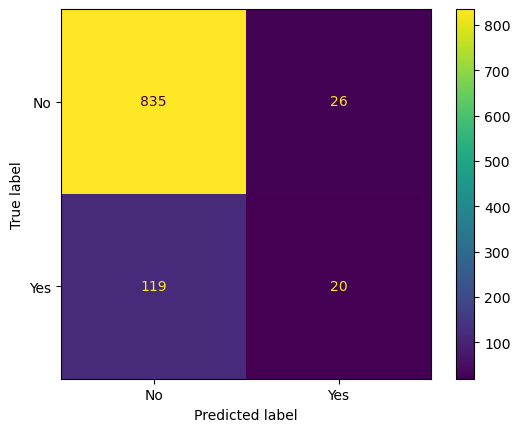

In [14]:
metrics.ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=model.classes_).plot();


In [15]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

          No       0.88      0.97      0.92       861
         Yes       0.43      0.14      0.22       139

    accuracy                           0.85      1000
   macro avg       0.66      0.56      0.57      1000
weighted avg       0.81      0.85      0.82      1000

